# 1. Data Preprocessing

### 1.1 Merge Data

In [269]:
# 전처리에 필요한 라이브러리
import os
import re
import sys
sys.path.append("/Users/joonwon/sejonguniversity/2021_2/advanced_ml/term_project/py-hanspell") # 다운로한 py-hanspell 경로
sys.path.append("/Users/joonwon/sejonguniversity/2021_2/advanced_ml/term_project/data") # raw dataset directory 경로
sys.path.append("/Users/joonwon/sejonguniversity/2021_2/advanced_ml/term_project/dataset/final") # final dataset directory 경로 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hanspell import spell_checker
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [3]:
data_path = os.path.join(os.getcwd(),"data")

In [4]:
file_list = os.listdir(data_path)

In [5]:
# 크롤링한 음식점 list
file_list

['귀한족발-직영점.csv',
 '파스타입니다-답십리점.csv',
 '낙곱새.csv',
 '혼밥대왕-건대점.csv',
 '장수장충동왕족발보쌈.csv',
 '옆집떡볶이-장안점.csv',
 '청년피자-광진구점.csv',
 '배달삼겹돼지되지-화양성수점.csv',
 '신불떡볶이-군자점.csv',
 'BBQ-군자점.csv',
 '처갓집양념치킨-구의광장점.csv',
 '써브웨이-군자역점.csv',
 'BHC-중곡점.csv',
 '버거킹-건대입구역점.csv',
 '롯데리아-답십리점.csv',
 '굽네치킨&피자-중곡1동점.csv',
 '빅스타피자-서울건대점.csv',
 '동강.csv',
 '싸움의고수_건대점.csv',
 '버거킹-군자능동점.csv',
 '직화구이통삼겹.csv',
 '피자나라치킨공주-장안1호점.csv',
 'BHC-자양행복점.csv',
 '맥도날드-어린이대공원점.csv',
 '오르새피자-건대점.csv',
 '롯데리아-성수역점.csv',
 '잭아저씨족발보쌈-장안점.csv',
 '스쿨푸드-자양딜리버리점.csv',
 '착한집장수왕족발보쌈.csv',
 '반올림피자샵-중곡면목점.csv',
 '스시교센.csv',
 '처갓집양념치킨-구의자야

In [6]:
len(file_list)

69

In [7]:
dataframe  = pd.read_csv(os.path.join(data_path,file_list[0]))

In [8]:
# 첫번재 음식점 및 리뷰 데이터를 dataframe 형태로 읽어드림
dataframe

,Unnamed: 0,name,taste,quantity,delivery,text
0,0,귀한족발-직영점,5,5,5,족발만 먹어봤는데 보쌈도 맛있어요!!!
1,1,귀한족발-직영점,4,5,5,고기가 부드럽고 맛나요. 찬들도 맛이 좋구요.
2,2,귀한족발-직영점,5,5,5,보쌈 너무 맛있어요
3,3,귀한족발-직영점,5,5,5,보쌈냄새하나도안나고 부드럽고 너무맛있어요~
4,4,귀한족발-직영점,5,5,5,오 여기 괜찮네요\n\n배달음식에 만족 한거 오랜만..
...,...,...,...,...,...,...
299,299,귀한족발-직영점,5,5,4,지나가다 가게를 보고 여기 떠있길래 시켜봤더니 깔끔하게 포장해주시도 양도 많고 딱 ...
300,300,귀한족발-직영점,5,5,5,가성비최고 맛도 좋습니다
301,301,귀한족발-직영점,5,4,4,시키고 조금 먹다가 다음 날에 먹었는데도 불구하고 맛있었습니다 정말 잘 먹었어요
302,302,귀한족발-직영점,5,5,5,진짜 별로 기대안하고 시켰는데 완전깔끔하고 양도 푸짐했어요!! 앞으로 족발은 여기서...


In [9]:
# 데이터 프레임 병합
for data in file_list[1:]:
    new_data = pd.read_csv(os.path.join(data_path,data))
    dataframe = pd.concat([dataframe,new_data])

In [10]:
dataframe

,Unnamed: 0,name,taste,quantity,delivery,text
0,0,귀한족발-직영점,5,5,5,족발만 먹어봤는데 보쌈도 맛있어요!!!
1,1,귀한족발-직영점,4,5,5,고기가 부드럽고 맛나요. 찬들도 맛이 좋구요.
2,2,귀한족발-직영점,5,5,5,보쌈 너무 맛있어요
3,3,귀한족발-직영점,5,5,5,보쌈냄새하나도안나고 부드럽고 너무맛있어요~
4,4,귀한족발-직영점,5,5,5,오 여기 괜찮네요\n\n배달음식에 만족 한거 오랜만..
...,...,...,...,...,...,...
2620,2620,멕시카나-화양점,5,5,5,"은은한커피 배달뺘른거에 한 번 놀라고,냄새에 두 번 놀라고,양에 세 번 놀라고,맛에..."
2621,2621,멕시카나-화양점,5,5,5,바삭하고 부드러웠어요. 그리고 역시 양념은 페리카나!
2622,2622,멕시카나-화양점,5,5,5,역시 맛있는 멕시카나 양념치킨 ㅠㅠ 아침부터 먹고싶었어요
2623,2623,멕시카나-화양점,5,5,5,치킨도 맛있고 양도 많고 배달원분도 너무 친절했어요~


In [11]:
# Unnamed column 제거
del dataframe['Unnamed: 0']

### 2.2 NAN 값 제거

In [12]:
# 결측치 제거
dataframe.dropna(inplace=True)
dataframe.reset_index(inplace=True,drop=True)

In [13]:
# 결측치 제거 후 개수
dataframe.shape

(172615, 5)

In [14]:
dataframe.head(50)

,name,taste,quantity,delivery,text
0,귀한족발-직영점,5,5,5,족발만 먹어봤는데 보쌈도 맛있어요!!!
1,귀한족발-직영점,4,5,5,고기가 부드럽고 맛나요. 찬들도 맛이 좋구요.
2,귀한족발-직영점,5,5,5,보쌈 너무 맛있어요
3,귀한족발-직영점,5,5,5,보쌈냄새하나도안나고 부드럽고 너무맛있어요~
4,귀한족발-직영점,5,5,5,오 여기 괜찮네요\n\n배달음식에 만족 한거 오랜만..
5,귀한족발-직영점,5,5,5,배달도 빨리왔고 써비스는 생각도 안했는데 챙겨주셔서 감사히 잘 먹었습니다. 맛도 있...
6,귀한족발-직영점,5,5,5,역시 양 많고 맛있어요! \n여기서만 주문해서 먹어요~ 고기 상태도 정말 좋아요~ ...
7,귀한족발-직영점,5,5,5,오엥 여기 징짜 맛있어요…인생 족발 찾았어열..
8,귀한족발-직영점,5,5,5,맛있게 잘 먹었어요~
9,귀한족발-직영점,5,5,5,맛있게 잘 먹었습니다


#### '맛' class에 대해서 결측치가 있는 데이터 제거 (-1이 결측치임)

In [15]:
dataframe['taste'].unique() # 맛의 unique한 class들 (-1은 결측치임)

array([ 5,  4,  1,  3,  2, -1])

In [16]:
dataframe.drop(dataframe[dataframe.taste == -1].index, inplace=True) # 맛==-1인 애들은 결측치임으로 제거

In [17]:
dataframe.reset_index(drop=True, inplace=True)

In [18]:
dataframe['taste'].value_counts() # 맛 분포

5    136743
4     18879
3      6453
1      2842
2      1886
Name: taste, dtype: int64

In [19]:
dataframe['taste'].value_counts()/dataframe.shape[0]

5    0.819787
4    0.113181
3    0.038686
1    0.017038
2    0.011307
Name: taste, dtype: float64

In [270]:
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='taste', ylabel='count'>

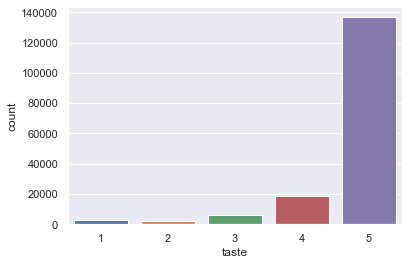

In [21]:
sns.countplot(x="taste", data=dataframe)

#### '배달' class에 대해서 결측치가 있는 데이터 제거 (-1이 결측치임)

In [22]:
# '배달'의 unique한 class들 (-1은 결측치임)
# '배달' class에는 크롤링 과정에서 str type도 포함되어 있어 sting > int로 변환 직업이 필요함
dataframe['delivery'].unique()

array([5, -1, 4, 2, 3, 1, '5', '4', '1', '3', '2'], dtype=object)

In [23]:
# str type > int type
str2int =  lambda x : int(x) if (type(x) == str) else x

In [24]:
dataframe['delivery'] = dataframe['delivery'].apply(str2int)

In [25]:
dataframe['delivery'].value_counts() # 배달 분포 - string type도 포함되어 있음 : str > int 변환 완료

 5    140558
 4     15046
 3      5396
 1      3218
 2      1509
-1      1076
Name: delivery, dtype: int64

In [26]:
dataframe.drop(dataframe[dataframe.delivery == -1].index, inplace=True) # 배달==-1인 애들은 결측치임으로 제거

In [27]:
dataframe.reset_index(drop=True,inplace=True)

In [28]:
dataframe['delivery'].value_counts() # 배달 분포

5    140558
4     15046
3      5396
1      3218
2      1509
Name: delivery, dtype: int64

<AxesSubplot:xlabel='delivery', ylabel='count'>

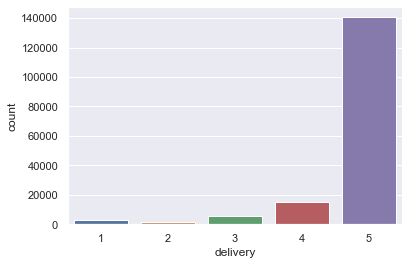

In [29]:
sns.countplot(x="delivery", data=dataframe)

#### '양' class에 대해서 결측치가 있는 데이터 제거 (-1이 결측치임)

In [30]:
# '양'의 unique한 class들 (-1은 결측치임)
# 이전에 결측치를 제거해서인지 '양' class에는 결측치가 없음
dataframe['quantity'].value_counts()

5    137549
4     17826
3      6718
1      2088
2      1546
Name: quantity, dtype: int64

<AxesSubplot:xlabel='quantity', ylabel='count'>

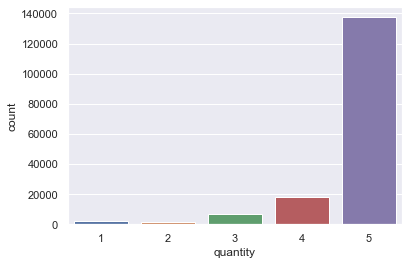

In [31]:
sns.countplot(x="quantity", data=dataframe)

In [33]:
dataframe.head(30)

,name,taste,quantity,delivery,text
0,귀한족발-직영점,5,5,5,족발만 먹어봤는데 보쌈도 맛있어요!!!
1,귀한족발-직영점,4,5,5,고기가 부드럽고 맛나요. 찬들도 맛이 좋구요.
2,귀한족발-직영점,5,5,5,보쌈 너무 맛있어요
3,귀한족발-직영점,5,5,5,보쌈냄새하나도안나고 부드럽고 너무맛있어요~
4,귀한족발-직영점,5,5,5,오 여기 괜찮네요\n\n배달음식에 만족 한거 오랜만..
5,귀한족발-직영점,5,5,5,배달도 빨리왔고 써비스는 생각도 안했는데 챙겨주셔서 감사히 잘 먹었습니다. 맛도 있...
6,귀한족발-직영점,5,5,5,역시 양 많고 맛있어요! \n여기서만 주문해서 먹어요~ 고기 상태도 정말 좋아요~ ...
7,귀한족발-직영점,5,5,5,오엥 여기 징짜 맛있어요…인생 족발 찾았어열..
8,귀한족발-직영점,5,5,5,맛있게 잘 먹었어요~
9,귀한족발-직영점,5,5,5,맛있게 잘 먹었습니다


### 1.3 Text Preprocssing

In [34]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U000E007F"  # 이모티콘
        u"\U0001F300-\U0001F5FF"  # 픽토그램
        u"\U0001F680-\U0001F6FF"  # 다른 그림들
        u"\U0001F1E0-\U0001F1FF"  # 플래그 (iOS)♥
                           "]+", flags=re.UNICODE)

In [35]:
def clean_text(text):
    text = re.sub('[①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮@$&#☆◇★○●◎◇◆□■△▲▽▼→←←↑↓↔〓◁◀▷▶♤♠♡♥♧♣⊙◈▣◐◑▒▤▥▨▧▦▩♨☏☎☜☞¶†‡↕↗↙↖↘]', '', text)
    text = re.sub(r"http[s]?://(?:[\t\n\r\f\v]|[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", '', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', text) # http로 시작되지 않는 url
    text = re.sub(emoji_pattern, '',text)
    text = text.replace("❤️","")
    text = text.replace("☺️","")
    text = re.sub('\([^])]*\)', '', text) # 괄호 제거
    text = re.sub('<[^]>]*>', '', text)
    text = re.sub('\[[^]]*\]', '', text)
    text = text.replace("\n", "")
    text = text.replace("\t", "")
    text = text.replace("\r", "")
    text = text.replace("      "," ")
    text = text.replace("    "," ")
    text = text.replace("   "," ")
    text = text.replace("  "," ")
    return text

In [36]:
# 텍스트 전처리 이전
for i in range(0,100):
    print(dataframe['text'][i])

족발만 먹어봤는데 보쌈도 맛있어요!!!
고기가 부드럽고 맛나요. 찬들도 맛이 좋구요.
보쌈 너무 맛있어요
보쌈냄새하나도안나고 부드럽고 너무맛있어요~
오 여기 괜찮네요

배달음식에 만족 한거 오랜만..
배달도 빨리왔고 써비스는 생각도 안했는데 챙겨주셔서 감사히 잘 먹었습니다. 맛도 있고 깔끔하네요.👍👍
역시 양 많고 맛있어요! 
여기서만 주문해서 먹어요~ 고기 상태도 정말 좋아요~ 
감사합니다! ^^
오엥 여기 징짜 맛있어요…인생 족발 찾았어열..
맛있게 잘 먹었어요~
맛있게 잘 먹었습니다
맛있습니다!!!!!
맛있게 먹었습니다.
두번째 주문인데 앞으로 귀한족발에서만 주문하려구요!! 여기 부추 존맛인데 사장님께 요청했더니 부추 엄청많이 주셔서 다 먹었어요^-^
건대족발중 최고에요
너무맛있고 양도많고 행복하게 먹었어요★
배달이 엄청 빨리 와서 놀랬어요 양도 많구 따뜻하고 맛있게 잘 먹었습니다 감사해요!
처음 먹어봤는데..
족발 간이 쎄지 않고 살코기가 부드러워 맛있게 먹었습니다.
서비스로 요청드린 콩나물 국도 너무 맛있었어요 ^^
조만간 또 시키겠습니다 ㅎ
이 지점은 처음 주문해봤는데 맛있었어요 또 시킬게요!
가끔 포장해서 먹다가 이번에 배달을 이용했는데 역시 맛있네요.
잘 먹고 있습니다
족발이 짜지 않고 아주 부드럽고 맛있었어요~
막국수도 너무 자극적이지 않으면서 적당히 매콤했어요!!
맛있게잘먹었습니다~~~
맛있게 잘 먹었습니다~
보통 진짜맛있거나 문제있을때만 리뷰쓰는데 진짜 맛있어요. 위생걱정때문에 배달 못시켜먹겠다는참에 이런 집을 보네요. 재료손질 깨끗하게 하시고 보쌈도 촉촉하니 너무 맛있고 막국수는 보통 떡져서 뭉탱이로 오는데 여긴 양도 적당하니 면이 붙어있지않고 맛있네요! 찜합니다~
배달이 진짜 빠르고 진짜 맛있었어요! 요청사항도 잘 들어주시고 ㅎㅎ푸짐하게 맛있게 잘 먹었습니다 또 시킬게요
맛도 맛있고 무엇보다 배달속도가...15분도 안되서 오네요 ㅎㅎ 맛있게잘먹었습니다
매운족발 맛있어요~~부드러워서 좋아요. 배달은 예상시간보다 빨리왔어요~~!
국수 무김치

In [37]:
dataframe['text'] = dataframe['text'].apply(clean_text)

In [38]:
# 텍스트 전처리 이후
for i in range(0,100):
    print(dataframe['text'][i])

족발만 먹어봤는데 보쌈도 맛있어요!!!
고기가 부드럽고 맛나요. 찬들도 맛이 좋구요.
보쌈 너무 맛있어요
보쌈냄새하나도안나고 부드럽고 너무맛있어요~
오 여기 괜찮네요배달음식에 만족 한거 오랜만..
배달도 빨리왔고 써비스는 생각도 안했는데 챙겨주셔서 감사히 잘 먹었습니다. 맛도 있고 깔끔하네요.
역시 양 많고 맛있어요! 여기서만 주문해서 먹어요~ 고기 상태도 정말 좋아요~ 감사합니다! ^^
오엥 여기 징짜 맛있어요…인생 족발 찾았어열..
맛있게 잘 먹었어요~
맛있게 잘 먹었습니다
맛있습니다!!!!!
맛있게 먹었습니다.
두번째 주문인데 앞으로 귀한족발에서만 주문하려구요!! 여기 부추 존맛인데 사장님께 요청했더니 부추 엄청많이 주셔서 다 먹었어요^-^건대족발중 최고에요
너무맛있고 양도많고 행복하게 먹었어요
배달이 엄청 빨리 와서 놀랬어요 양도 많구 따뜻하고 맛있게 잘 먹었습니다 감사해요!
처음 먹어봤는데..족발 간이 쎄지 않고 살코기가 부드러워 맛있게 먹었습니다.서비스로 요청드린 콩나물 국도 너무 맛있었어요 ^^조만간 또 시키겠습니다 ㅎ
이 지점은 처음 주문해봤는데 맛있었어요 또 시킬게요!
가끔 포장해서 먹다가 이번에 배달을 이용했는데 역시 맛있네요.잘 먹고 있습니다
족발이 짜지 않고 아주 부드럽고 맛있었어요~막국수도 너무 자극적이지 않으면서 적당히 매콤했어요!!
맛있게잘먹었습니다~~~
맛있게 잘 먹었습니다~
보통 진짜맛있거나 문제있을때만 리뷰쓰는데 진짜 맛있어요. 위생걱정때문에 배달 못시켜먹겠다는참에 이런 집을 보네요. 재료손질 깨끗하게 하시고 보쌈도 촉촉하니 너무 맛있고 막국수는 보통 떡져서 뭉탱이로 오는데 여긴 양도 적당하니 면이 붙어있지않고 맛있네요! 찜합니다~
배달이 진짜 빠르고 진짜 맛있었어요! 요청사항도 잘 들어주시고 ㅎㅎ푸짐하게 맛있게 잘 먹었습니다 또 시킬게요
맛도 맛있고 무엇보다 배달속도가...15분도 안되서 오네요 ㅎㅎ 맛있게잘먹었습니다
매운족발 맛있어요~~부드러워서 좋아요. 배달은 예상시간보다 빨리왔어요~~!
국수 무김치 보쌈 국수 모든게 맛있

In [39]:
# hanspell의 spell_checker를 활용해 맞춤법 검사를 진행

In [40]:
spell_check = lambda x : spell_checker.check(x).checked

In [41]:
dataframe['text'][1000]

'지난번에 처음 먹어보고 맛있어서 또 주문했습니다~등심 돈까스 품절이라고 전화오셔서 같은 가격인 허쉬브라운 맛있다고 하셔서 변경했는데, 확인해보니 허쉬브라운은 1000원이네요ㅠ; 저는 세트로 구매해서 세트가격으로 변경해주셔야하는데 사이드 단품가격으로 변경해주신거 같아요~ 그래도 맛있어서 잘 먹었습니다'

In [42]:
spell_check(dataframe['text'][1000])

'지난번에 처음 먹어보고 맛있어서 또 주문했습니다~등심 돈가스 품절이라고 전화 오셔서 같은 가격인 허쉬 브라운 맛있다고 하셔서 변경했는데, 확인해보니 허쉬 브라운은 1000원이네요ㅠ; 저는 세트로 구매해서 세트 가격으로 변경해주셔야 하는데 사이드 단품 가격으로 변경해주신 거 같아요~ 그래도 맛있어서 잘 먹었습니다'

In [43]:
index_cnt = []
for i in tqdm(range(dataframe.shape[0])):
    try :
        dataframe['text'][i] = spell_check(dataframe['text'][i])
    except :
        index_cnt.append(i)

  0%|          | 0/165727 [00:00<?, ?it/s]<ipython-input-43-428d64940ec8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['text'][i] = spell_check(dataframe['text'][i])
100%|██████████| 165727/165727 [2:53:09<00:00, 15.95it/s]  


In [44]:
index_cnt # 19236, 20736, 38427, 99639 는 제외하기로 함

[81262, 83204, 83872, 85916, 136647, 165363]

In [45]:
dataframe.drop(index=index_cnt, inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [285]:
# 텍스트 전처리 이후
for i in range(0,100):
    print(dataframe['text'][i])

족발만 먹어봤는데 보쌈도 맛있어요!!!
고기가 부드럽고 맛나요. 찬들도 맛이 좋고요.
보쌈 너무 맛있어요
보쌈 냄새 하나도 안 나고 부드럽고 너무 맛있어요~
오 여기 괜찮네요 배달음식에 만족한 거 오랜만..
배달도 빨리 왔고 서비스는 생각도 안 했는데 챙겨주셔서 감사히 잘 먹었습니다. 맛도 있고 깔끔하네요.
역시 양 많고 맛있어요! 여기서만 주문해서 먹어요~ 고기 상태도 정말 좋아요~ 감사합니다! ^^
오에 여기 진짜 맛있어요…인생 족발 찾았어 열..
맛있게 잘 먹었어요~
맛있게 잘 먹었습니다
맛있습니다!!!!!
맛있게 먹었습니다.
두 번째 주문인데 앞으로 귀한 족발에서만 주문하려고요!! 여기 부추 존 만인데 사장님께 요청했더니 부추 엄청 많이 주셔서 다 먹었어요^-^건대 족발 중 최고예요
너무 맛있고 양도 많고 행복하게 먹었어요
배달이 엄청 빨리 와서 놀랬어요 양도 많고 따뜻하고 맛있게 잘 먹었습니다 감사해요!
처음 먹어봤는데.. 족발 간이 세지 않고 살코기가 부드러워 맛있게 먹었습니다. 서비스로 요청드린 콩나물국도 너무 맛있었어요 ^^조만간 또 시키겠습니다 ㅎ
이 지점은 처음 주문해봤는데 맛있었어요 또 시킬게요!
가끔 포장해서 먹다가 이번에 배달을 이용했는데 역시 맛있네요. 잘 먹고 있습니다
족발이 짜지 않고 아주 부드럽고 맛있었어요~막국수도 너무 자극적이지 않으면서 적당히 매콤했어요!!
맛있게 잘 먹었습니다~~~
맛있게 잘 먹었습니다~
보통 진짜 맛있거나 문제 있을 때만 리뷰 쓰는데 진짜 맛있어요. 위생 걱정 때문에 배달 못 시켜 먹겠다는 참에 이런 집을 보네요. 재료 손질 깨끗하게 하시고 보쌈도 촉촉하니 너무 맛있고 막국수는 보통 떡져서 뭉텅이로 오는데 여긴 양도 적당하니 면이 붙어있지 않고 맛있네요! 찜합니다~
배달이 진짜 빠르고 진짜 맛있었어요! 요청사항도 잘 들어주시고 ㅎㅎ푸짐하게 맛있게 잘 먹었습니다 또 시킬게요
맛도 맛있고 무엇보다 배달 속도가... 15분도 안 돼서 오네요 ㅎㅎ 맛있게 잘 먹었습니다
매운 족발 맛있어요~~부드러워서 좋아요. 배

In [47]:
# 전처리 후에 2글자이하인 리뷰는 제거함
short_list =[]
for i in range(dataframe.shape[0]):
    if len(dataframe['text'].iloc[i])<=2 :
        short_list.append(i)

In [49]:
dataframe.drop(index=short_list, inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [268]:
dataframe

,name,taste,quantity,delivery,text
0,귀한족발-직영점,5,5,5,족발만 먹어봤는데 보쌈도 맛있어요!!!
1,귀한족발-직영점,4,5,5,고기가 부드럽고 맛나요. 찬들도 맛이 좋고요.
2,귀한족발-직영점,5,5,5,보쌈 너무 맛있어요
3,귀한족발-직영점,5,5,5,보쌈 냄새 하나도 안 나고 부드럽고 너무 맛있어요~
4,귀한족발-직영점,5,5,5,오 여기 괜찮네요 배달음식에 만족한 거 오랜만..
...,...,...,...,...,...
163717,멕시카나-화양점,5,5,5,"은은한 커피 배달뺘른거에 한 번 놀라고, 냄새에 두 번 놀라고, 양에 세 번 놀라고..."
163718,멕시카나-화양점,5,5,5,바삭하고 부드러웠어요. 그리고 역시 양념은 페리카나!
163719,멕시카나-화양점,5,5,5,역시 맛있는 멕시카나 양념치킨 ㅠㅠ 아침부터 먹고 싶었어요
163720,멕시카나-화양점,5,5,5,치킨도 맛있고 양도 많고 배달원분도 너무 친절했어요~


### 1.4 Data Filtering

In [227]:
dataframe.to_csv('final_preprocessed_dataset.csv',index=False)

In [ ]:
for i in range(dataframe.shape[0]):
    if ('배달' or '시간' or  '배송' or '빠' or '빨' or '시간' or '늦' or '느' or '도착')not in dataframe['text'].iloc[i] and \
    ('맛' or '느끼' or '짜' or '달' or '부드' or '눅눅' or '매콤' or '맵' or '매운') not in dataframe['text'].iloc[i] in dataframe['text'].iloc[i] and \
    ('양' or '많'or '푸짐' or '적' or '조금' or '적당') not in dataframe['text'].iloc[i]:
        print("맛 : {}, 배달 :{}, 양 : {}, 리뷰 문장 : {}".format(dataframe['taste'].iloc[i], dataframe['delivery'].iloc[i], dataframe['quantity'].iloc[i], dataframe['text'].iloc[i]))

In [ ]:
맛 : 3, 배달 :3, 양 : 2, 리뷰 문장 : 주꾸미가 몇 개 없는데 다 아기들이네요. ㅠㅠ
맛 : 3, 배달 :3, 양 : 3, 리뷰 문장 : 그냥 그래요....
맛 : 5, 배달 :5, 양 : 5, 리뷰 문장 : 앞으로 여기서 자주 시켜 먹을 듯 너무 좋았다 진짜로
맛 : 3, 배달 :2, 양 : 4, 리뷰 문장 : 정식이 두 개인데 국물은 하나만 와서 전화 여러 번 했는데 안 받으시네요 앞으로 꼼꼼히 좀 챙겨주세요.
맛 : 1, 배달 :5, 양 : 1, 리뷰 문장 : 전에도 그러시더니 또 비빔장에 고추장을 안 주셨어요 ㅠ.ㅠ 이제 여기서 안 시켜 먹을래요.
맛 : 5, 배달 :5, 양 : 5, 리뷰 문장 : 여긴 우 삼겹 된장이 진리
맛 : 4, 배달 :3, 양 : 4, 리뷰 문장 : 솔직한 리뷰 달면 영업에 반영될 것 같아 별점으로 만 남기겠습니다                

##### 맛, 양, 배달과 관련된 단어가 없으면 예측이 어려움으로

##### 리뷰 텍스트에 형태소 분석을 수행해 '맛', '배달'과 '양'과 관련된 형태소가 등장하는 리뷰 텍스트만 모델링에 활용하려 한다.

In [271]:
# 형태소 분석에는 konlpy의 mecab의 활용
from tqdm.notebook import tqdm
from konlpy.tag import Mecab
from collections import Counter

In [272]:
mecab = Mecab()

In [273]:
# 리뷰 텍스트 내의 모든 형태소 단위를 추출
pos_list = []
for i in tqdm(range(dataframe.shape[0])):
    pos_list += mecab.pos(dataframe['text'].iloc[i])

In [274]:
# 등장 빈도 수 기준 상위 400개의 형태소 검색
pos_count = Counter(pos_list)
post_most_common_400 = pos_count.most_common(400)
post_most_common_400 = [value[0][0] for value in post_most_common_400]

In [277]:
# 등장 빈도 상위 400개의 형태소
for i in range(0,400,10):
    print(post_most_common_400[i:i+10])

['맛있', '먹', '고', '어요', '었', '도', '.', '습니다', '!', '잘']
['게', '이', '배달', '에', '는데', '좋', '맛', '너무', '은', '네요']
['는', '가', '~', '양', '하', '는', '많', '시켜', '이', '빠르']
['어', '았', '주', '아요', '네요', '하', '어서', '.', '거', '주문']
['안', '진짜', '을', '감사', '또', '같', '항상', '정말', 'ㅎㅎ', '은']
[',', '시', '다', '있', '로', '하', '지만', '족발', '좀', '!']
['..', '~~', '으로', '한', '^^', '을', '역시', '합니다', '만', '것']
['없', '보다', '최고', '굿', '다음', '여기', '맛나', '지', '더', '했']
['치킨', '시간', '서비스', '겠', '않', '요', '시켰', '리뷰', '게', '많이']
['입니다', '오', '고기', '음', '집', '기', '세요', '아', '엄청', '빨리']
['아서', '셔서', '소스', '에서', 'ㅠㅠ', '있', '때', '한', '번', '왔']
['아요', '있', '!!', '사진', '만족', '를', '피자', '면', '들', '해']
['조금', '봤', '분', '못', '괜찮', '찍', 'ㅋㅋ', '셨', '자주', '생각']
['치즈', '늦', '와서', '시킬', '서', '?', '합니다', '받', '싶', '보']
['니', '음식', '떡볶이', '친절', '양념', '다', '의', '오늘', '주', '엔']
['처음', '양', '다른', '요', '막국수', '듯', '까지', '라', '인데', '신']
['님', '근데', '1', '푸짐', '그냥', 'ㅎ', '이', '밥', '으면', '만']
['아주', '보쌈', '에요', '시키', '수', '했', '했', '이벤트', '요청'

### 1.5 Data Filtering & Train/Test Split

##### 배달

In [ ]:
'배달' or '시간' or  '배송' or '빠' or '빨' or '시간' or '늦' or '느' or '도착' # 배달 관련 형태소

In [ ]:
delivery_list = []
for i in range(dataframe.shape[0]):
    if ('배달' or '시간' or  '배송' or '빠' or '빨' or '시간' or '늦' or '느' or '도착') in dataframe['text'].iloc[i]:
        print("맛 : {}, 배달 :{}, 양 : {}, 리뷰 문장 : {}".format(dataframe['taste'].iloc[i], dataframe['delivery'].iloc[i], dataframe['quantity'].iloc[i], dataframe['text'].iloc[i]))
        delivery_list.append(i)

In [233]:
delivery = dataframe.loc[delivery_list,:]
delivery.reset_index(drop=True, inplace=True)

In [294]:
delivery.shape

(33226, 5)

In [238]:
delivery['delivery'].value_counts()/len(delivery)

5    0.804490
4    0.083669
1    0.050111
3    0.043129
2    0.018600
Name: delivery, dtype: float64

<AxesSubplot:xlabel='delivery', ylabel='count'>

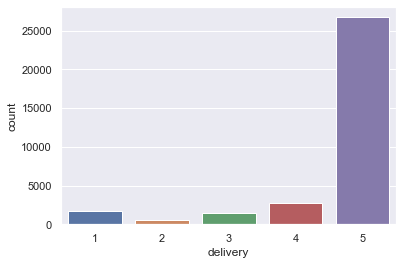

In [295]:
sns.countplot(x="delivery", data=delivery) 

In [240]:
# Train Data와 Test Data를 계층적 샘플링을 활용해 0.95 : 0.05의 비율로 나눔
delivery_train, delivery_test = train_test_split(delivery, test_size=0.1, 
                               stratify=delivery['delivery'], random_state=42)

<AxesSubplot:xlabel='delivery', ylabel='count'>

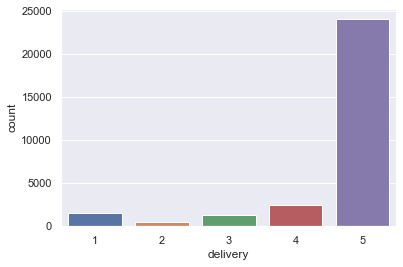

In [278]:
sns.countplot(x="delivery", data=delivery_train) # Train Data 분포

<AxesSubplot:xlabel='delivery', ylabel='count'>

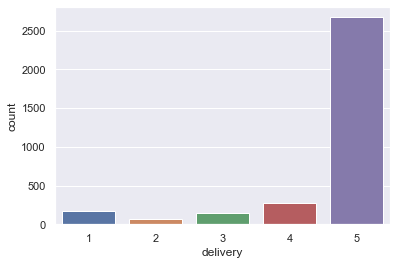

In [279]:
sns.countplot(x="delivery", data=delivery_test) # Test Data 분포

In [241]:
delivery_train.to_csv("train_delivery.csv",index=False)
delivery_test.to_csv("test_delivery.csv",index=False)

##### 맛

In [ ]:
'맛' or '느끼' or '짜' or '달' or '부드' or '눅눅' or '매콤' or '맵' or '매운' # 맛 관련 형태소

In [ ]:
taste_list = []
for i in range(dataframe.shape[0]):
    if ('맛' or '느끼' or '짜' or '달' or '부드' or '눅눅' or '매콤' or '맵' or '매운') in dataframe['text'].iloc[i] in dataframe['text'].iloc[i]:
        print("맛 : {}, 배달 :{}, 양 : {}, 리뷰 문장 : {}".format(dataframe['taste'].iloc[i], dataframe['delivery'].iloc[i], dataframe['quantity'].iloc[i], dataframe['text'].iloc[i]))
        taste_list.append(i)

In [246]:
taste = dataframe.loc[taste_list,:]
taste.reset_index(drop=True, inplace=True)

In [291]:
taste.shape

(117559, 5)

In [260]:
taste['taste'].value_counts()/len(taste)

5    0.860878
4    0.100851
3    0.024473
1    0.007588
2    0.006210
Name: taste, dtype: float64

<AxesSubplot:xlabel='taste', ylabel='count'>

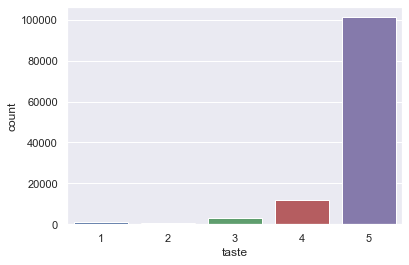

In [296]:
sns.countplot(x="taste", data=taste) 

In [248]:
# Train Data와 Test Data를 계층적 샘플링을 활용해 0.95 : 0.05의 비율로 나눔
taste_train, taste_test = train_test_split(taste, test_size=0.1, 
                               stratify=taste['taste'], random_state=42)

<AxesSubplot:xlabel='taste', ylabel='count'>

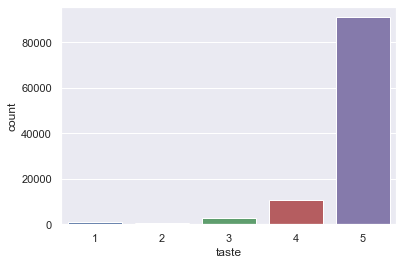

In [281]:
sns.countplot(x="taste", data=taste_train) # Train Data 분포

<AxesSubplot:xlabel='taste', ylabel='count'>

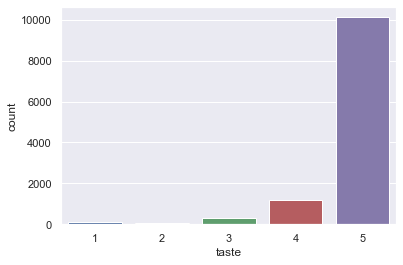

In [282]:
sns.countplot(x="taste", data=taste_test) # Test Data 분포

In [249]:
taste_train.to_csv("train_taste.csv",index=False)
taste_test.to_csv("test_taste.csv",index=False)

##### 양

In [ ]:
'양' or '많'or '푸짐' or '적' or '조금' or '적당' # 양 관련 형태소

In [ ]:
quantity_list = []
for i in range(dataframe.shape[0]):
    if ('양' or '많'or '푸짐' or '적' or '조금' or '적당') in dataframe['text'].iloc[i]:
        print("맛 : {}, 배달 :{}, 양 : {}, 리뷰 문장 : {}".format(dataframe['taste'].iloc[i], dataframe['delivery'].iloc[i], dataframe['quantity'].iloc[i], dataframe['text'].iloc[i]))
        quantity_list.append(i)

In [265]:
quantity = dataframe.loc[quantity_list,:]
quantity.reset_index(drop=True, inplace=True)

In [292]:
quantity.shape

(26111, 5)

In [262]:
quantity['quantity'].value_counts()/len(quantity)

5    0.814101
4    0.102524
3    0.051243
2    0.017541
1    0.014592
Name: quantity, dtype: float64

<AxesSubplot:xlabel='quantity', ylabel='count'>

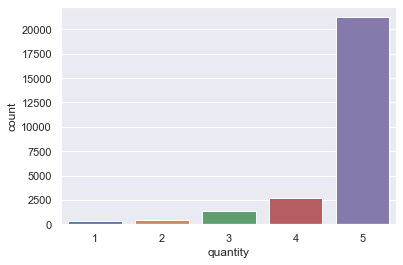

In [297]:
sns.countplot(x="quantity", data=quantity) 

In [263]:
# Train Data와 Test Data를 계층적 샘플링을 활용해 0.95 : 0.05의 비율로 나눔
quantity_train, quantity_test = train_test_split(quantity, test_size=0.1, 
                               stratify=quantity['quantity'], random_state=42)

<AxesSubplot:xlabel='quantity', ylabel='count'>

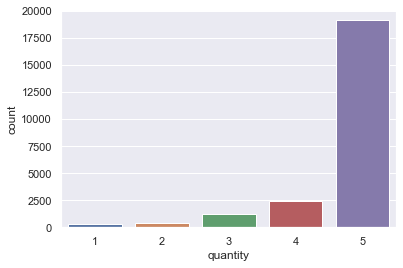

In [283]:
sns.countplot(x="quantity", data=quantity_train) # Train Data 분포

<AxesSubplot:xlabel='quantity', ylabel='count'>

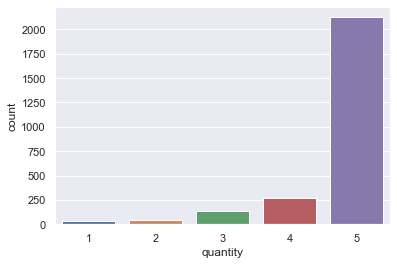

In [284]:
sns.countplot(x="quantity", data=quantity_test) # Test Data 분포

In [264]:
quantity_train.to_csv("train_quantity.csv",index=False)
quantity_test.to_csv("test_qunatity.csv",index=False)